## Gradient Descent for 1 independent variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

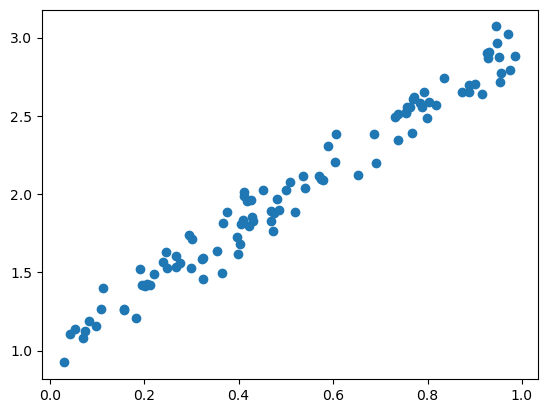

In [12]:
num_points = 100
x_list = np.random.rand(num_points)

# Generate corresponding y values with some random noise
# y = 2x + 1 + noise
noise = np.random.normal(0, 0.1, num_points)  # Add some random noise
y_list = 2 * x_list + 1 + noise

plt.plot(x_list, y_list, 'o')

In [18]:
def sum_loss(y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        sum += np.mean(np.square(y_true - y_pred))
    return sum


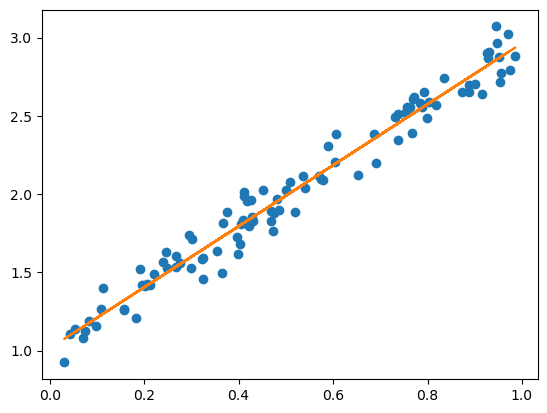

Optimized coefficients:
a: 1.9490653810538054
b: 1.0152600399778753


In [28]:
step_size = 0.01
a = 10
b = 1
loss_list = []

for _ in range(10000):
    y_pred_list = []
    a_gradient = 0
    b_gradient = 0
    for i in range(len(x_list)):
        y_pred = a * x_list[i] + b
        y_pred_list.append(y_pred)
        a_gradient += -2 * (y_list[i] - y_pred) * x_list[i]
        b_gradient += -2 * (y_list[i] - y_pred)
    a_gradient /= len(x_list)
    b_gradient /= len(x_list)
    a -= a_gradient * step_size
    b -= b_gradient * step_size
    loss_list.append(sum_loss(y_list, y_pred_list))
    

# Prediction
y_pred_list = [a * x + b for x in x_list]

# Plotting
plt.plot(x_list, y_list, 'o')
plt.plot(x_list, y_pred_list)
plt.show()

print("Optimized coefficients:")
print("a:", a)
print("b:", b)

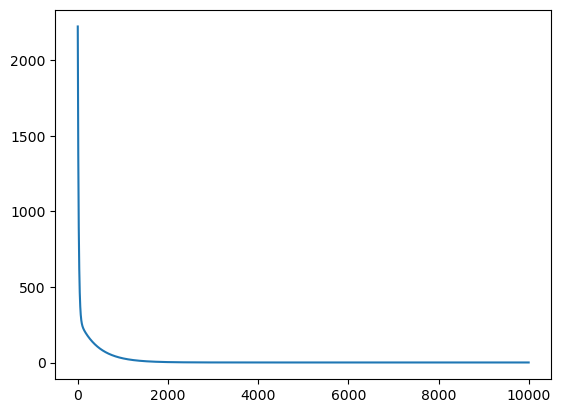

In [30]:
plt.plot(loss_list)


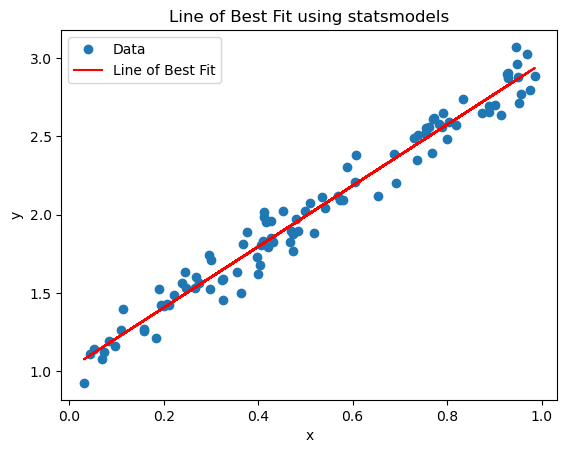

In [16]:
# Add a constant to the input features to account for the intercept term
X = sm.add_constant(x_list)

# Create a linear regression model
model = sm.OLS(y_list, X)

# Fit the model to your data
results = model.fit()

# Get the predicted values
y_pred = results.predict(X)

# Plotting
plt.plot(x_list, y_list, 'o', label='Data')
plt.plot(x_list, y_pred, color='red', label='Line of Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line of Best Fit using statsmodels')
plt.legend()
plt.show()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3010.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.25e-75
Time:                        21:34:12   Log-Likelihood:                 91.068
No. Observations:                 100   AIC:                            -178.1
Df Residuals:                      98   BIC:                            -172.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0153      0.021     48.674      0.0

## Gradient Descent for 2 independent variable

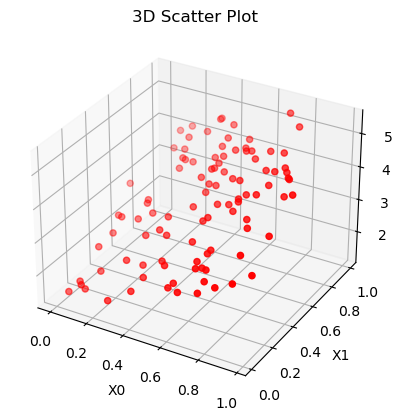

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_points = 100

# Generate x0_list
x0_list = np.random.rand(num_points)

# Generate x1_list
x1_list = np.random.rand(num_points)

# Generate corresponding y values with some random noise
# y = 2*x0 + 3*x1 + 1 + noise
noise = np.random.normal(0, 0.1, num_points)  # Add some random noise
y_list = 2 * x0_list + 3 * x1_list + 1 + noise

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x0_list, x1_list, y_list, c='r', marker='o')

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')

plt.title('3D Scatter Plot')
plt.show()

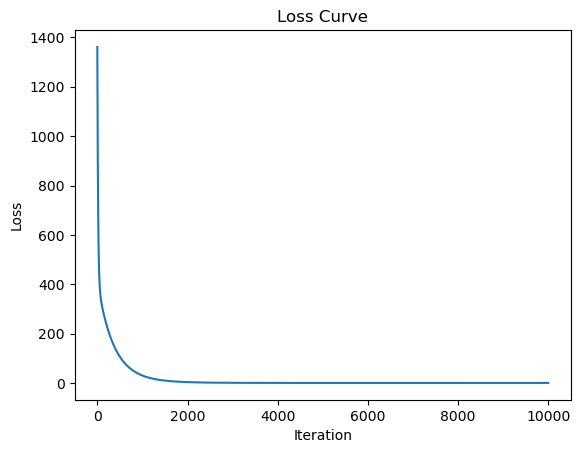

Optimized coefficients:
a: 1.9710021476405803
b: 2.9803637464669976
c: 1.0136166285286707


In [3]:
# Function to calculate total loss
def sum_loss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Initial coefficients
a = 10
b = 1
c = 1

# Step size
step_size = 0.01

# Number of iterations
num_iterations = 10000

# Loss list to keep track of loss values during optimization
loss_list = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred_list = []
    a_gradient = 0
    b_gradient = 0
    c_gradient = 0
    for i in range(len(x0_list)):
        y_pred = a * x0_list[i] + b * x1_list[i] + c
        y_pred_list.append(y_pred)
        a_gradient += -2 * (y_list[i] - y_pred) * x0_list[i]
        b_gradient += -2 * (y_list[i] - y_pred) * x1_list[i]
        c_gradient += -2 * (y_list[i] - y_pred)
    a_gradient /= len(x0_list)
    b_gradient /= len(x0_list)
    c_gradient /= len(x0_list)
    a -= a_gradient * step_size
    b -= b_gradient * step_size
    c -= c_gradient * step_size
    loss_list.append(sum_loss(y_list, y_pred_list))

# Prediction
y_pred_list = [a * x0 + b * x1 + c for x0, x1 in zip(x0_list, x1_list)]

# Plotting
plt.plot(range(num_iterations), loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

print("Optimized coefficients:")
print("a:", a)
print("b:", b)
print("c:", c)

In [4]:
# Concatenate a constant column to the input features
X = sm.add_constant(np.column_stack((x0_list, x1_list)))

# Create a linear regression model
model = sm.OLS(y_list, X)

# Fit the model to your data
results = model.fit()

# Get the predicted values
y_pred = results.predict(X)

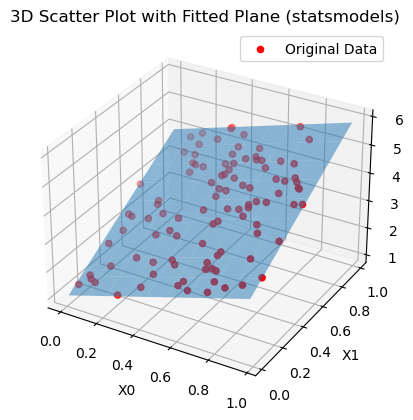

Optimized coefficients:
Intercept: 1.0140943884390938
Coefficient for X0: 1.9704820010102533
Coefficient for X1: 2.9799720183504146


In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for original data
ax.scatter(x0_list, x1_list, y_list, c='r', marker='o', label='Original Data')

# Plot the plane defined by the regression model
x0_range = np.linspace(min(x0_list), max(x0_list), 10)
x1_range = np.linspace(min(x1_list), max(x1_list), 10)
X0, X1 = np.meshgrid(x0_range, x1_range)
Y = results.params[0] + results.params[1] * X0 + results.params[2] * X1
ax.plot_surface(X0, X1, Y, alpha=0.5)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.title('3D Scatter Plot with Fitted Plane (statsmodels)')
plt.legend()
plt.show()

print("Optimized coefficients:")
print("Intercept:", results.params[0])
print("Coefficient for X0:", results.params[1])
print("Coefficient for X1:", results.params[2])

## Generalize Gradient Descent to N independent variable

In [6]:
# Function to calculate total loss
def sum_loss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Gradient Descent Function
def gradient_descent(X, y, initial_coeffs, step_size, num_iterations):
    coeffs = initial_coeffs
    loss_list = []

    for _ in range(num_iterations):
        y_pred = np.dot(X, coeffs)
        gradient = -2 * np.dot(X.T, (y - y_pred)) / len(X)
        coeffs -= step_size * gradient
        loss_list.append(sum_loss(y, y_pred))

    return coeffs, loss_list

In [11]:
# Generate random data
num_points = 100
num_features = 10  # Number of features including the intercept term
X = np.column_stack((np.ones(num_points), np.random.rand(num_points, num_features - 1)))  # Features matrix
coefficients = np.random.rand(num_features)  # Random initial coefficients
noise = np.random.normal(0, 0.1, num_points)
y = np.dot(X, coefficients) + noise  # True relationship: y = X * coefficients + noise

In [12]:
# Gradient Descent Parameters
initial_coeffs = np.random.rand(num_features)  # Random initial coefficients
step_size = 0.01
num_iterations = 10000

In [13]:
# Run Gradient Descent
optimal_coeffs, loss_list = gradient_descent(X, y, initial_coeffs, step_size, num_iterations)

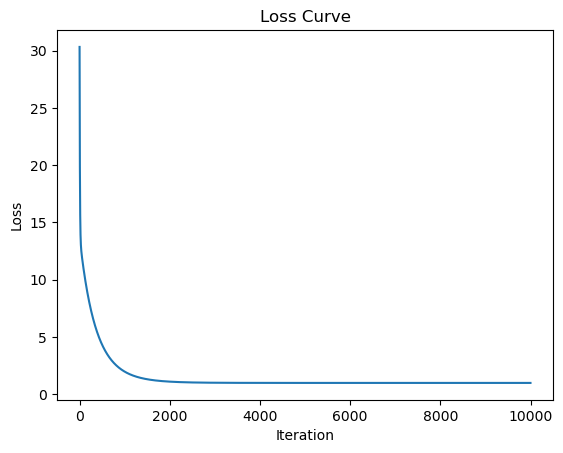

Optimized coefficients:
[0.80007125 0.4407801  0.37605117 0.71886609 0.82755198 0.29758207
 0.53536772 0.8130696  0.40426048 0.3577726 ]


In [14]:
# Plot Loss Curve
plt.plot(range(num_iterations), loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

print("Optimized coefficients:")
print(optimal_coeffs)